## Access Radar Bonneycoast Velocity Hourly Averaged Delayed QC data in Zarr
A jupyter notebook to show how to access and plot the AODN radar_BonneyCoast_velocity_hourly_averaged_delayed_qc dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/38dd003d-2f71-4715-bd3f-4b1cfdce391d).

In [1]:
dataset_name = "radar_BonneyCoast_velocity_hourly_averaged_delayed_qc"

In [2]:
import xarray as xr
import fsspec

## Install/Update packages and Load common functions

In [3]:
# only run once, then restart session if needed
!pip install uv

import os
import sys

def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

# Get the current directory of the notebook
current_dir = os.getcwd()

# Check if requirements.txt exists in the current directory
local_requirements = os.path.join(current_dir, 'requirements.txt')
if os.path.exists(local_requirements):
    requirements_path = local_requirements
else:
    # Fall back to the online requirements.txt file
    requirements_path = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/requirements.txt'

# Install packages using uv and the determined requirements file
if is_colab():
    xr.set_options(display_style='text')
    os.system(f'uv pip install --system -r {requirements_path}')
else:
    os.system('uv venv')
    os.system(f'uv pip install -r {requirements_path}')

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Resolved 233 packages in 1.12s
Prepared 1 package in 57ms
Uninstalled 1 package in 0.77ms
Installed 1 package in 2ms
 - fsspec==2024.10.0.post20+g4a6d573 (from file:///home/lbesnard/github_repo/aodn_cloud_optimised/filesystem_spec)
 + fsspec==2024.10.0


In [4]:
import requests
import os
if not os.path.exists('DataQuery.py'):
  print('Downloading DataQuery.py')
  url = 'https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/aodn_cloud_optimised/lib/DataQuery.py'
  response = requests.get(url)
  with open('DataQuery.py', 'w') as f:
      f.write(response.text)

In [5]:
from DataQuery import create_timeseries, plot_time_coverage, plot_gridded_radar_velocity, plot_radar_velocity_rose

In [6]:
# remote zarr dataset
url = f's3://aodn-cloud-optimised/{dataset_name}.zarr/'
ds = xr.open_zarr(fsspec.get_mapper(url, anon=True), consolidated=True)
ds

ValueError: conflicting sizes for dimension 'TIME': length 44329 on 'UCUR_quality_control' and length 26829 on {'TIME': 'GDOP', 'I': 'GDOP', 'J': 'GDOP'}

## Plot time coverage

In [ ]:
plot_time_coverage(ds, time_var="TIME")

## Plot a gridded variable

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:620: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar


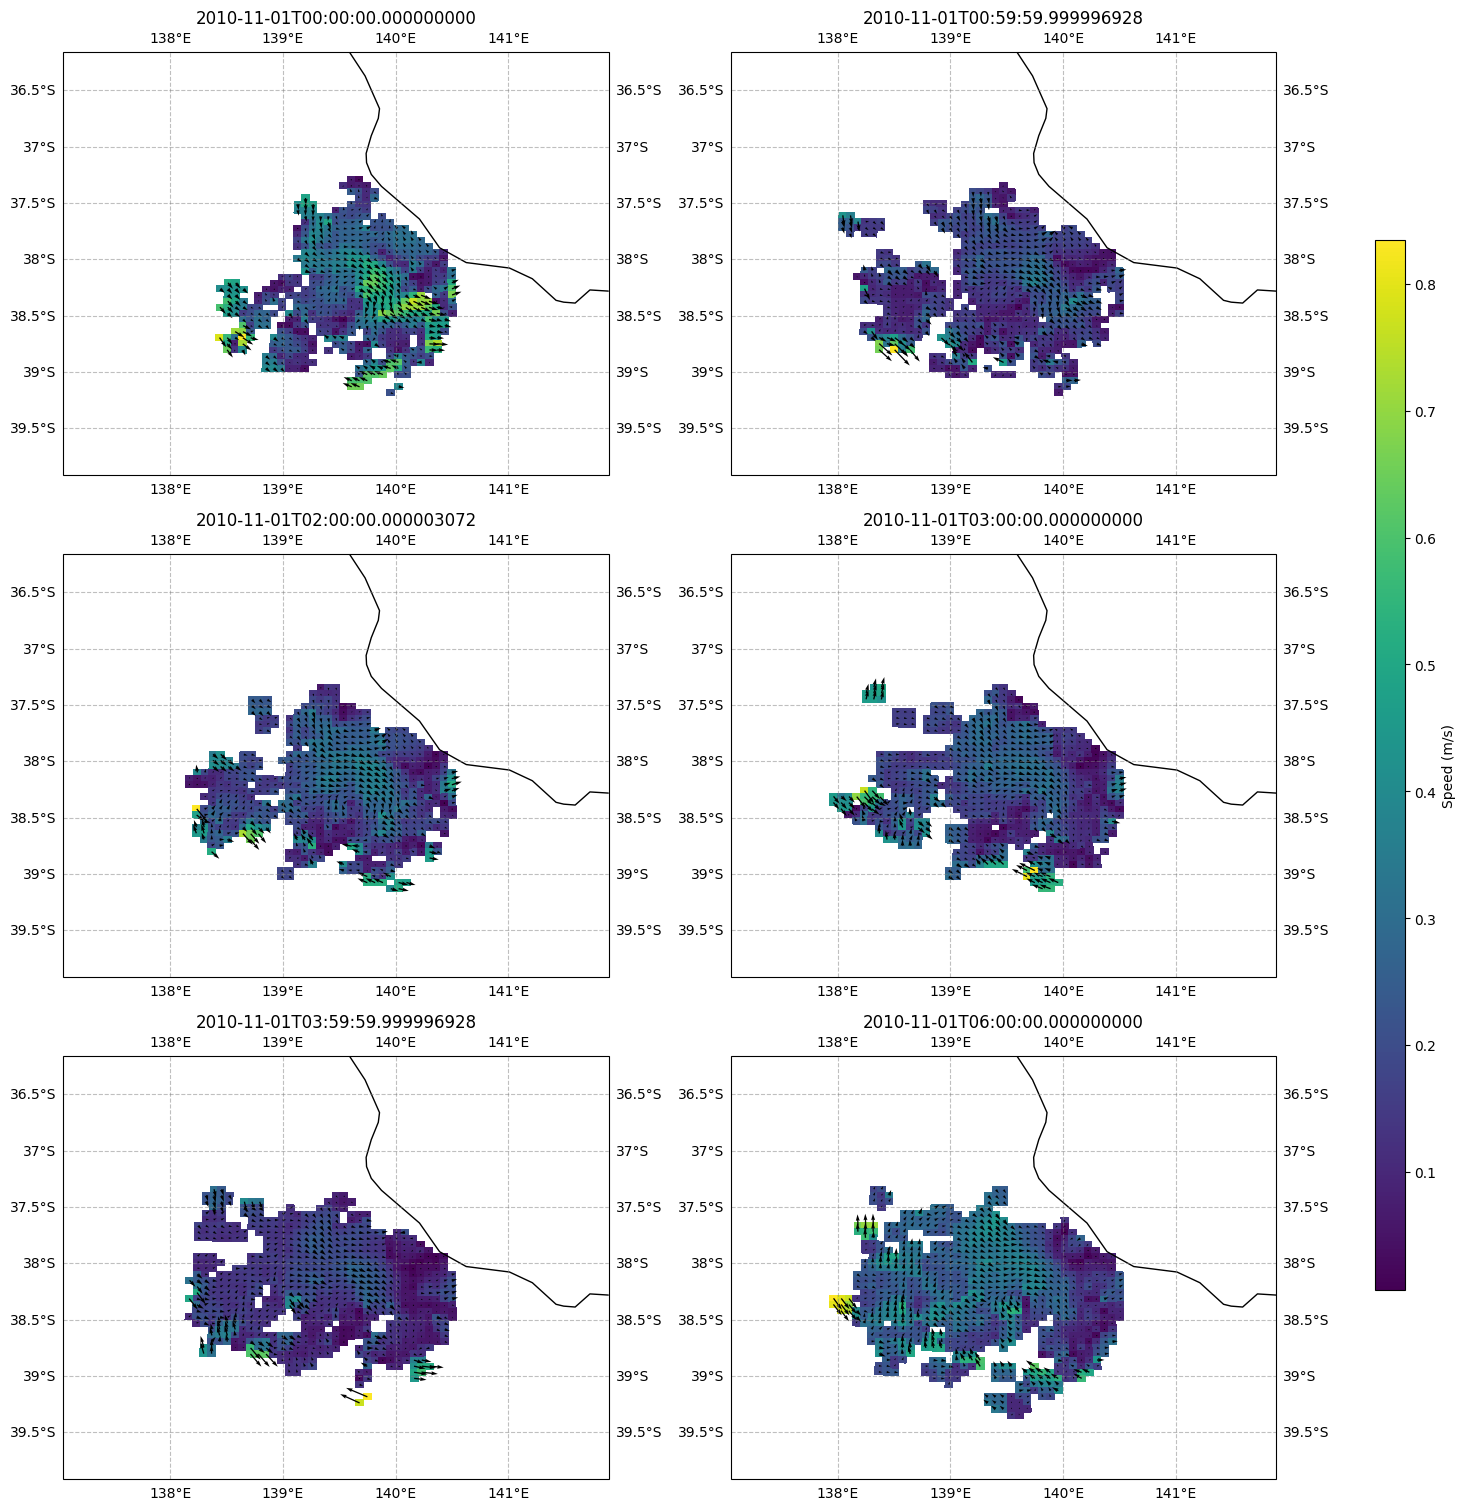

In [8]:
plot_gridded_radar_velocity(ds, time_start='2010-11-01T00:00:00')

<Figure size 800x800 with 0 Axes>

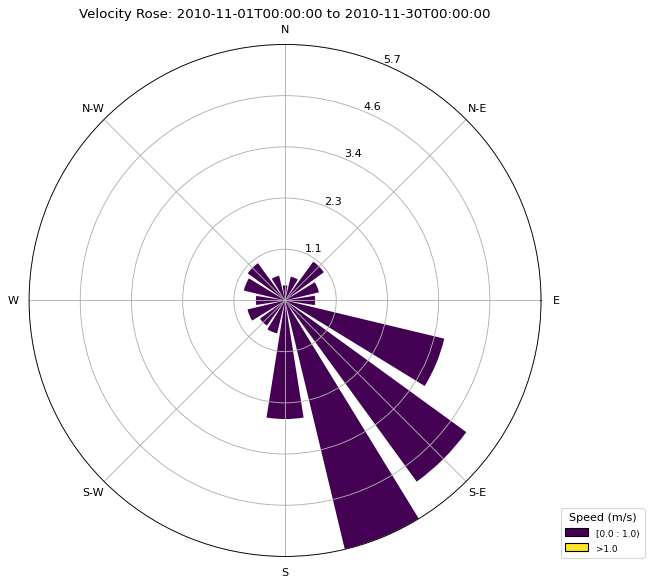

In [9]:
plot_radar_velocity_rose(ds, time_start='2010-11-01T00:00:00', time_end='2010-11-30T00:00:00')